In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from clustergen import generar_datos
from knn import KNN

In [77]:
Xall, yall = generar_datos(6, 2, nDatos=100)
m = len(yall)
shuffle = np.random.permutation(m)
slice = int(.7*m)

Xall = Xall[shuffle]
yall = yall[shuffle]

Xtrain = Xall[:slice,:]
ytrain = yall[:slice]
Xtest = Xall[slice:,:]
ytest = yall[slice:]

model = KNN()
model.loadData(Xtrain, ytrain)


In [78]:
y1 = model.predict(Xtest, 1)
print("Accuracy for 1 neighbor: {:.2f}".format(model.accuracy(y1, ytest)))
y3 = model.predict(Xtest, 3)
print("Accuracy for 3 neighbors: {:.2f}".format(model.accuracy(y3, ytest)))
y7 = model.predict(Xtest, 7)
print("Accuracy for 7 neighbors: {:.2f}".format(model.accuracy(y7, ytest)))

Accuracy for 1 neighbor: 0.96
Accuracy for 3 neighbors: 0.96
Accuracy for 7 neighbors: 0.96


In [79]:
min1, max1 = Xtrain[:, 0].min()-1, Xtrain[:, 0].max()+1
min2, max2 = Xtrain[:, 1].min()-1, Xtrain[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, .5)
x2grid = np.arange(min2, max2, .5)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
yhat1 = model.predict(grid, 1)
yhat3 = model.predict(grid, 3)
yhat7 = model.predict(grid, 7)
# reshape the predictions back into a grid
zz1 = yhat1.reshape(xx.shape)
zz3 = yhat3.reshape(xx.shape)
zz7 = yhat7.reshape(xx.shape)


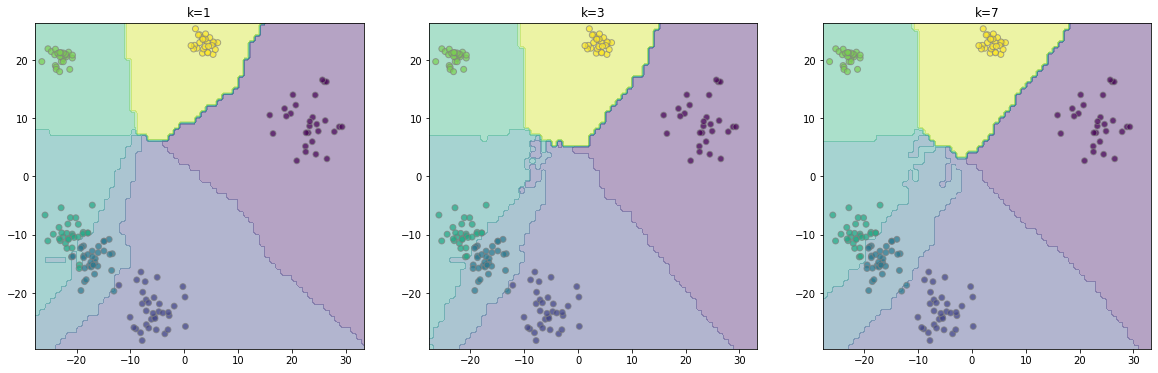

In [80]:
# plot the grid of x, y and z values as a surface
img = plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.contourf(xx, yy, zz1, cmap='viridis', alpha=.4)
ax1.scatter(Xtest[:, 0], Xtest[:, 1], c=y1, cmap='viridis', edgecolors='gray', alpha=.7)
ax1.set_title("k=1")

ax2.contourf(xx, yy, zz3, cmap='viridis', alpha=.4)
ax2.scatter(Xtest[:, 0], Xtest[:, 1], c=y3, cmap='viridis', edgecolors='gray', alpha=.7)
ax2.set_title("k=3")

ax3.contourf(xx, yy, zz7, cmap='viridis', alpha=.4)
ax3.scatter(Xtest[:, 0], Xtest[:, 1], c=y7, cmap='viridis', edgecolors='gray', alpha=.7)
ax3.set_title("k=7");
